 We will be  implementing different validation methods and compare their performances.
Here, we are working with dataset about criminal records in various community.

In [1]:
#loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore') 
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso # For LASSO
from sklearn.metrics import mean_squared_error # For evaluation
from sklearn import metrics

In [2]:
# Loading the file
data = pd.read_csv('community.csv')
data.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,nonViolPerPop
0,11980,3.10,1.37,91.78,6.50,1.88,12.47,21.44,10.93,11.33,...,10.66,53.72,65.29,78.09,89.14,6.5,1845.9,9.63,0.0,1394.59
1,23123,2.82,0.80,95.57,3.44,0.85,11.01,21.30,10.48,17.18,...,8.30,77.17,71.27,90.22,96.12,10.6,2186.7,3.84,0.0,1955.95
2,29344,2.43,0.74,94.33,3.43,2.35,11.36,25.88,11.01,10.28,...,5.00,44.77,36.60,61.26,82.85,10.6,2780.9,4.37,0.0,6167.51
3,11245,2.76,0.53,89.16,1.17,0.52,24.46,40.53,28.69,12.65,...,1.74,73.75,42.22,60.34,89.02,11.5,974.2,0.38,0.0,9988.79
4,140494,2.45,2.51,95.65,0.90,0.95,18.09,32.89,20.04,13.26,...,1.49,64.35,42.29,70.61,85.66,70.4,1995.7,0.97,0.0,6867.42


We will observe the data now.

In [3]:
data.shape

(2118, 102)

We will create our response and predictor variables. 

In [4]:
# Separate the X and Y
X = data.copy() 
del X['nonViolPerPop']
y = data['nonViolPerPop']

Now, to track various computing process timings, we have defined tic and toe, which will basically be placed in our code's beginning and end respectively. Their time difference will be our computing time.

In [5]:
#Computing process timing
import time
tic = time.process_time()   #stores process time
toc = time.process_time()   #stores process time
print ("\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")


 ----- Computation time = 0.0ms


Now before the fitting the data we will split the data into training, test and validation data. Then we scale the data. We have placed tic at the top of code and toc at the bottom to calculate computation time.

In [6]:
tic = time.process_time()
# Train+Valid / test sets split. Use random_state 1
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# Train/valid sets split. Use random_state 1
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size = 0.3, random_state = 1)

# Scale data (only fit with the training data, and transform both the training and validation data)
scaler = StandardScaler() 
scaler.fit(X_train) 
X_valid = pd.DataFrame(scaler.transform(X_valid)) 
X_valid.columns = X.columns.values
X_train = pd.DataFrame(scaler.transform(X_train)) 
X_train.columns = X.columns.values
toc = time.process_time()
print(X_valid.mean())
print(X_valid.std())

population            -0.004981
householdsize          0.029821
racepctblack           0.009925
racePctWhite           0.006423
racePctAsian           0.041576
                         ...   
PctSameState85        -0.047977
LandArea              -0.020620
PopDens                0.054011
PctUsePubTrans         0.036836
LemasPctOfficDrugUn    0.002286
Length: 101, dtype: float64
population             0.590395
householdsize          1.022156
racepctblack           1.048639
racePctWhite           0.998521
racePctAsian           1.070864
                         ...   
PctSameState85         1.052080
LandArea               0.358184
PopDens                1.229877
PctUsePubTrans         1.007764
LemasPctOfficDrugUn    1.273218
Length: 101, dtype: float64


In [7]:
print ("\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")


 ----- Computation time = 0.0ms


##### We can see that our computation time for scaling the data after splitting the data is 15.625ms.

In the next part, we will perform lasso regression on the data, print it's MSE values & coefficients and record it's computation time.

In [8]:
# Lasso regression
tic = time.process_time()
lm_lasso = linear_model.Lasso().fit(X_train,y_train)
print(pd.DataFrame(zip(X_train.columns.values, lm_lasso.coef_)))
print(metrics.mean_squared_error(lm_lasso.predict(X_valid), y_valid))

                       0           1
0             population -214.971024
1          householdsize -493.653070
2           racepctblack  385.845159
3           racePctWhite  411.795373
4           racePctAsian  322.305410
..                   ...         ...
96        PctSameState85   68.394559
97              LandArea  -68.425691
98               PopDens -230.044354
99        PctUsePubTrans -134.304970
100  LemasPctOfficDrugUn  249.510874

[101 rows x 2 columns]
3317750.448686371


In [9]:
score=lm_lasso.score(X_valid, y_valid)
toc = time.process_time()
print (" Lasso Score is "+str(score)+"\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

 Lasso Score is 0.5699344966981389
 ----- Computation time = 171.875ms


We can see that the Lasso Score is 0.5699 and the computation time captured to perform this step is 1031.25 ms. This step is taking more time for computation maybe because it is considering all 101 predictors and then computing it's MSE value.

Now we will find best alpha parameter for the Lasso model and display.

[(1e-10, 3328324.0690982915), (1e-09, 3328324.0690689855), (1e-08, 3328324.0687758923), (1e-07, 3328324.0658449708), (1e-06, 3328324.0365357804), (1e-05, 3328323.7434453345), (0.0001, 3328320.812686128), (0.001, 3328291.502464277), (0.01, 3327999.1876934455), (0.1, 3325361.8531911992), (1.0, 3317750.448686371), (10.0, 3351763.6297321427), (100.0, 3616281.0702169337), (1000.0, 5089594.534037838), (10000.0, 7714906.969245019), (100000.0, 7714906.969245019), (1000000.0, 7714906.969245019), (10000000.0, 7714906.969245019), (100000000.0, 7714906.969245019), (1000000000.0, 7714906.969245019), (10000000000.0, 7714906.969245019)]


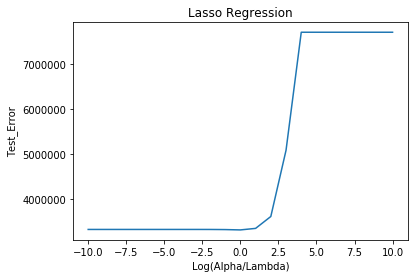

In [10]:
alphas = np.logspace(-10, 10, 21) # We will use lambda on powers of 10 scale
alphas_index = np.linspace(-10, 10, 21) # The lambda values on log scale

Validation_Scores = []
for a in alphas:
    lm = linear_model.Lasso(alpha=a)
    lm.fit(X_train, y_train) # Fit model on training+validation set
    Validation_Scores.append(metrics.mean_squared_error(lm.predict(X_valid), y_valid)) # Evaluate model on test set


print(list(zip(alphas, Validation_Scores))) #print all alphas and validation scores to plot graph.
plt.plot(alphas_index, Validation_Scores)
plt.xlabel("Log(Alpha/Lambda)")
plt.ylabel("Test_Error")
plt.title("Lasso Regression")
plt.show()

In [11]:
min(Validation_Scores) #fetches minimum validation score.
alphas[np.argmin(Validation_Scores)]

1.0

Now we will find the smallest prediction error for lasso model.

In [12]:
# Smallest Prediction Error
tic = time.process_time()
lm_lasso = linear_model.Lasso(alpha = 10).fit(X_train,y_train)
toc = time.process_time()
print(pd.DataFrame(zip(X_train.columns.values, lm_lasso.coef_)))
print(metrics.mean_squared_error(lm_lasso.predict(X_valid), y_valid))
print ("\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

                       0           1
0             population   -0.000000
1          householdsize -303.932580
2           racepctblack   49.602928
3           racePctWhite    0.000000
4           racePctAsian   43.385785
..                   ...         ...
96        PctSameState85   -0.000000
97              LandArea  -28.751322
98               PopDens -257.382070
99        PctUsePubTrans  -95.741881
100  LemasPctOfficDrugUn  244.265297

[101 rows x 2 columns]
3351763.6297321427

 ----- Computation time = 187.5ms


Prediction error for testing set

In [13]:
#Now use the training+validation set, refit the model using the best lambda from above, and perform prediction on the test set. 
#At this point you should scale using both the training+validation data together. 
#What is the prediction error on the test set with this lambda value?


# Scale data (use t
scaler.fit(X_train_valid) 
X_train_valid = pd.DataFrame(scaler.transform(X_train_valid)) 
X_test = pd.DataFrame(scaler.transform(X_test)) 
X_train_valid.columns = X.columns.values
X_test.columns = X.columns.values
print(X_train_valid.mean())
print(X_train_valid.std())


# Refit model with train + validation set, perform prediction on test set
lm = linear_model.Lasso(alpha = alphas[np.argmin(Validation_Scores)] )
lm.fit(X_train_valid, y_train_valid)
print(pd.DataFrame(zip(lm.coef_,X.columns)))
print("The prediction error on the testing set is", metrics.mean_squared_error(lm.predict(X_test), y_test))

population             1.460820e-17
householdsize         -3.602606e-16
racepctblack          -7.221694e-17
racePctWhite           1.517754e-16
racePctAsian           6.083003e-17
                           ...     
PctSameState85         3.456524e-16
LandArea              -2.775558e-17
PopDens               -5.184037e-17
PctUsePubTrans        -2.458110e-18
LemasPctOfficDrugUn   -7.164010e-16
Length: 101, dtype: float64
population             1.000338
householdsize          1.000338
racepctblack           1.000338
racePctWhite           1.000338
racePctAsian           1.000338
                         ...   
PctSameState85         1.000338
LandArea               1.000338
PopDens                1.000338
PctUsePubTrans         1.000338
LemasPctOfficDrugUn    1.000338
Length: 101, dtype: float64
              0                    1
0      0.000000           population
1   -477.290736        householdsize
2    457.146689         racepctblack
3    390.474557         racePctWhite
4    252.67

We can see that the values for:

The prediction error on the validation set is 3351763.6297321427

The prediction error on the testing set is 3622527.9572477085


In [14]:
lm.score(X_valid, y_valid)  #accuracy of Lasso model

0.6268724646590897

# Grid Search

Now we will be performing 5 fold cross validation and then 10 fold to compare their computation time.

In [15]:
# imports for cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [16]:
# Set up the model pipeline
estimator = Pipeline(steps = [('scale', StandardScaler()), # We first need to scale the data
                     ('lasso', Lasso()) ]) # Then fit the scaled data using Lasso

# Set up the parameters for each item in the pipeline
# Parameters of pipelines can be set using ‘__’ separating the parameter names:
parameters = {'lasso__alpha': np.logspace(-10,10,21),
             'lasso__max_iter': [50,70,100]} # Here is a second argument for Lasso, just to illustrate how to add
                                          # multiple hyperparameters to tune. (have taken random num here)

#Method-Grid Search-5 fold CV
tic = time.process_time()
reg = GridSearchCV(estimator = estimator, param_grid = parameters, cv = 5, 
                   scoring = 'neg_mean_squared_error', n_jobs = -1) # Instantiate the gridsearch
reg.fit(X_train, y_train) # Fit the grid search, i.e. perform CV and grid search. 
reg.best_params_ # The best parameter from CV
toc = time.process_time()

In [17]:
reg.predict(X_test) # This is how we perform prediction
mse=mean_squared_error(reg.predict(X_test), y_test)
score=reg.score(X_valid, y_valid)

In [18]:
print (" Best Parameters for 5 fold CV= " + str(reg.best_params_) + "\n Mean Squared Error= " + str(mse)+"\n Score= " + str(score)+"\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

 Best Parameters for 5 fold CV= {'lasso__alpha': 10.0, 'lasso__max_iter': 100}
 Mean Squared Error= 3538489.301508037
 Score= -3362366.7466791393
 ----- Computation time = 1546.875ms


In [19]:
#Method-Grid Search-10 fold CV
tic = time.process_time()
reg = GridSearchCV(estimator = estimator, param_grid = parameters, cv = 10, 
                   scoring = 'neg_mean_squared_error', n_jobs = -1) # Instantiate the gridsearch
reg.fit(X_train, y_train) # Fit the grid search, i.e. perform CV and grid search. 
reg.best_params_ # The best parameter from CV
toc = time.process_time()

In [20]:
reg.predict(X_test) # This is how we perform prediction
mse=mean_squared_error(reg.predict(X_test), y_test)
score=reg.score(X_valid, y_valid)

In [21]:
print (" Best Parameters for 10 fold CV= " + str(reg.best_params_) + "\n Mean Squared Error= " + str(mse)+"\n Score= " + str(score)+"\n ----- Computation time = " + str(1000*(toc - tic)) + "ms")

 Best Parameters for 10 fold CV= {'lasso__alpha': 10.0, 'lasso__max_iter': 100}
 Mean Squared Error= 3538489.301508037
 Score= -3362366.7466791393
 ----- Computation time = 2718.75ms


### CONCLUSION

By performing the 5-fold CV & 10-fold CV, now we can compare both of them to observe that:

    MSE for 5-fold is      3538489.301508037
    MSE for 10-fold is     3538489.301508037
    MSE for testing set is 3622527.9572477085

    Score for 5-fold is      -3362366.7466791393
    Score for 10-fold is     -3362366.7466791393
    Score for testing set is  0.6268724646590897
    
    Computation time for 5-fold      is 1687.5 ms
    Computation time for 10-fold     is 2484.375 ms
    

With the data above, it can be observed that, the 5-fold CV is better than other methods as it has less computation time despite having similar MSE.
Since, the number of records is limited, we don't see difference in the scores.Only the computation time is informing about the efficiency of the model. Hence, we will go with 5-fold CV with this dataset.